<h1>Wykorzystanie drzew decyzyjnych do klasyfikacji dokumentów tekstowych</h1>

<h9>W pierwszym kroku zaimportowane zostają biblioteki i funkcje, które zostaną następnie użyte w projekcie.</h9>

In [1]:
# Import bibliotek
from sklearn.datasets import fetch_20newsgroups
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt

<h9>Do wykonania projektu użyte zostały dane Twenty Newsgroups z pakietu scikit learn, na które składa się około 18 000 postów z grup dyskusyjnych, podzielonych na 20 kategorii, które zostały wyświetlone poniżej. Zbiór ten rozdzielony jest na dwa podzbiory: trenujący i testujący, a podział określony jest przez sztywno określoną datę publikacji postów (posty przed tą datą i posty zamieszczone po niej). Funkcja `sklearn.datasets.fetch_20newsgroups` służy do przygotowania i załadowania odpowiedniego z podzbiorów. W pierwszym kroku będzie to zbiór trenujący.
</h9>

In [2]:
#Import zbioru danych Twenty Newsgroups - zbiór testujący
twenty_train = fetch_20newsgroups(subset='train', shuffle=True)
#Wyświetlenie wszystkich kategorii (target_names)
twenty_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

<h9>Do sformatowania zbioru trenującego użyto funkcji `CountVectorizer` oraz `TfidfTransformer`. 
    <br><br>
    Funkcja `sklearn.feature_extraction.text.CountVectorizer` tworzy wektory częstości występowania poszczególnych słów w dokumentach. W parametrze max_features ustawiona została liczba 1600, co oznacza, że do stworzenia wektora zostanie użytych maksymalnie 1600 słów o największej częstości występowania. Kolejny parametr `min_df` informuje o tym, w co najmniej ilu dokumentach słowo musi zostać użyte, aby mogło znaleźć się w zbiorze. Parametr `max_df`, został ustawiony na 0,75, co oznacza, że słowo dodawane do zbioru nie może być użyte w więcej niż 75% dokumentów. Takie ustawienia pozwolą na wyeliminowanie słów, które są neutralne lub nieistotne dla klasyfikacji.
    <br><br>
    Funkcja `sklearn.feature_extraction.text.TfidfTransformer` transformuje stworzoną wcześniej macierz. TFIDF to metoda obliczania wagi słów wg. częstości ich występowania w tekście. Zastosowanie tej metody pozwoli na pozbycie się słów typu *and*, *the*, *a*, poprzez zwiększenie wagi słów, które występują rzadziej. Następnie tak obrobione dane są "wstawiane" do klasyfikatora.
</h9>

In [3]:
#Formatowanie zbioru trenującego oraz wprowadzenie go do algorytmu DTC
clf = Pipeline([('vect', CountVectorizer(max_features=1600, min_df=2, max_df=0.75)), 
                ('tfidf', TfidfTransformer()), 
                ('clf', DecisionTreeClassifier(criterion="gini"))])

<h9>W kolejnym kroku importowane są dane testowe, które pozwolą na przetestowanie skuteczności klasyfikatora.</h9>

In [4]:
#Import zbioru testującego
twenty_test = fetch_20newsgroups(subset='test', shuffle=True)

<h9>Następnie funkcja `clf.fit(twenty_train.data, twenty_train.target)` buduje drzewo decyzyjne ze zbioru trenującego. Funkcja `clf.predict(twenty_test.data)` przydziela dane testowe do odpowiednich klas.</h9>

In [5]:
#Predykcja
clf = clf.fit(twenty_train.data, twenty_train.target)
predicted = clf.predict(twenty_test.data)
predicted

array([ 1,  4,  0, ..., 17, 12, 15])

<h9>Ostatnim krokiem jest sprawdzenie dokładności predykcji. W tym celu wykorzystywana jest funkcja `mean`, która wylicza stosunek dobrych dopasowań do wszystkich dopasowań.</h9>

In [6]:
#Sprawdzenie dokładności
np.mean(predicted == twenty_test.target)

0.5146043547530537

In [7]:
count_pred = np.zeros(20)
cat = np.arange(20)
for x in cat:
    for y in predicted:
        if x == y:
            count_pred[x]=count_pred[x]+1
            

<h9>Poniżej został przedstawiony wykres przedstawiający ilość dokumentów przyporządkowanych za pomocą algorytmu do dostępnych kategorii.</h9>

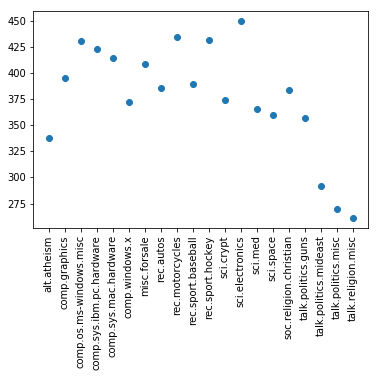

In [8]:
x = twenty_train.target_names
plt.xticks(rotation=90)
plt.scatter(x, count_pred)
plt.show()

<h9>Dla porównania poniżej znajduje się wykres przedstawiający faktyczną ilość dokumentów ze zbioru testowego w kategoriach</h9>

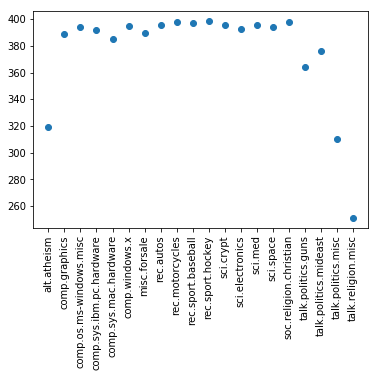

In [9]:
count_target = np.zeros(20)
for x in cat:
    for y in twenty_test.target:
        if x == y:
            count_target[x]=count_target[x]+1
            
x = twenty_train.target_names
plt.xticks(rotation=90)
plt.scatter(x, count_target)
plt.show()
            

<h9>Podsumowując, dokładność dopasowania dla tego algorytmu jest słaba i wynosi niewiele ponad 50%, co potwierdzają powyższe wykresy. Algorytm ten jest mało skuteczny dla tych danych.</h9>